In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import

In [558]:
#import df
train = pd.read_csv('train.csv')

In [559]:
#preview full training set
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [560]:
train.info()
train.describe()
#observations: we have some missing data - specifically for age and cabin and embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


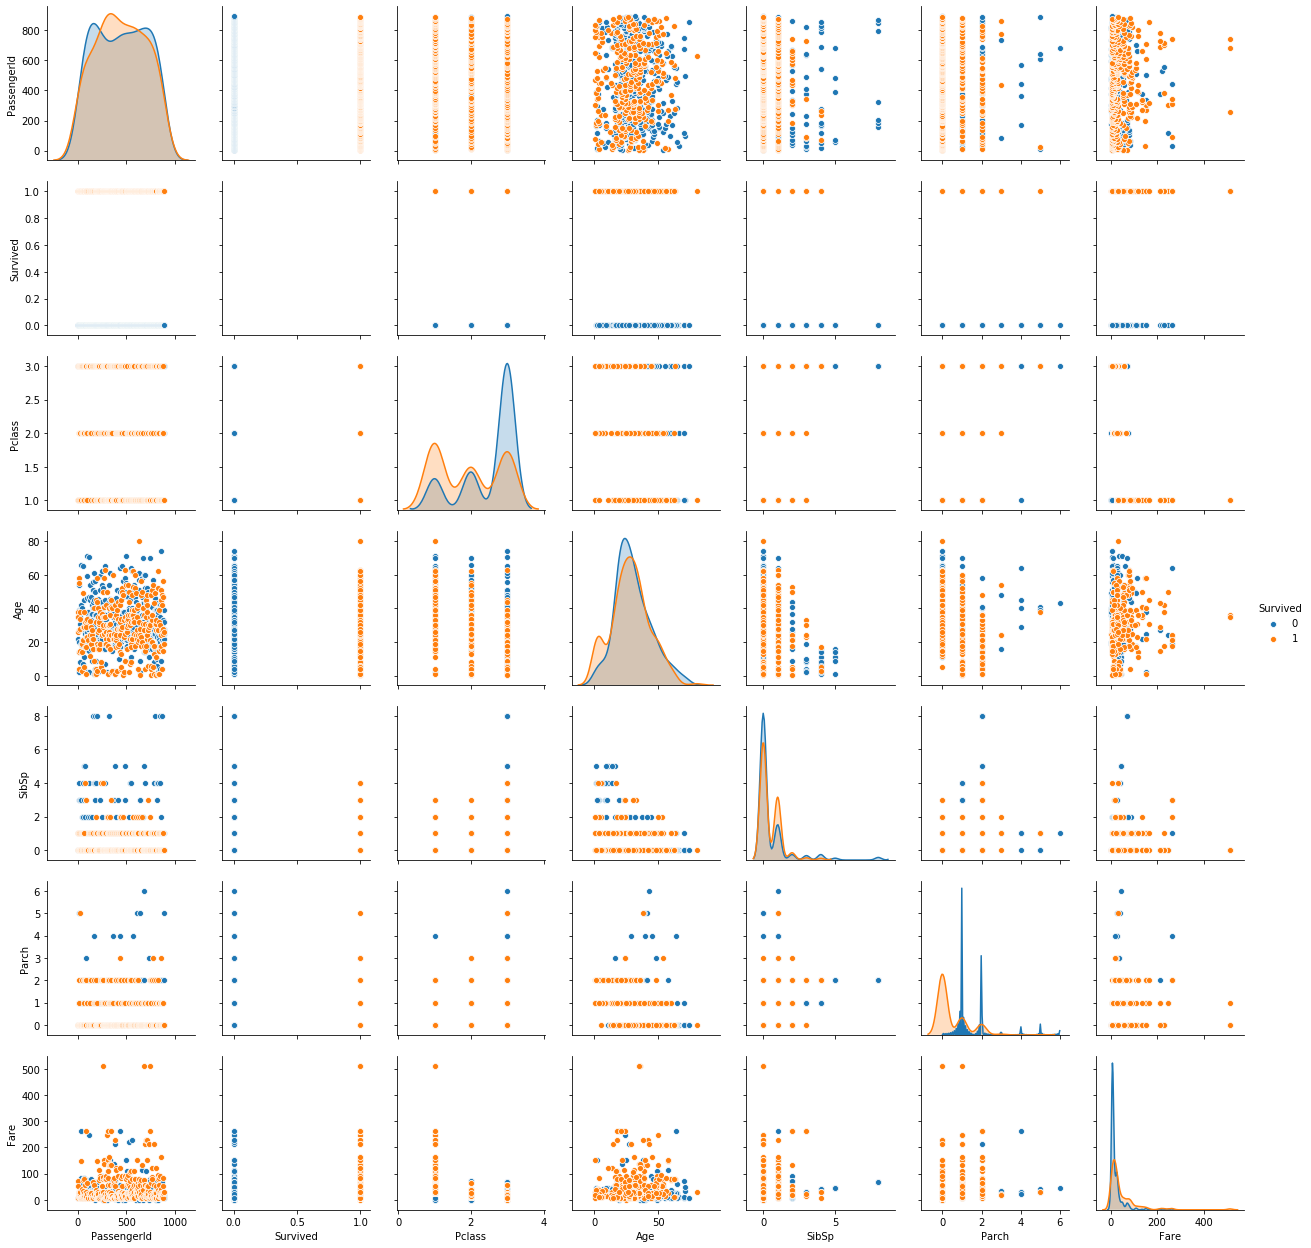

In [94]:
sns.pairplot(train, hue='Survived')

0    0.616162
1    0.383838
Name: Survived, dtype: float64

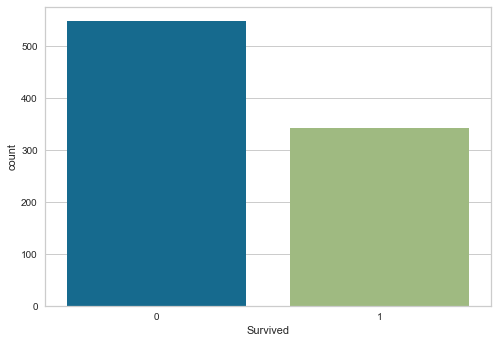

In [561]:
#explore target (survival)
sns.countplot(x='Survived', data=train)

train['Survived'].value_counts(normalize=True) #shows % split

#observations: fairly even, about 60/40 (probably don't have to do resampling but could test at the end)

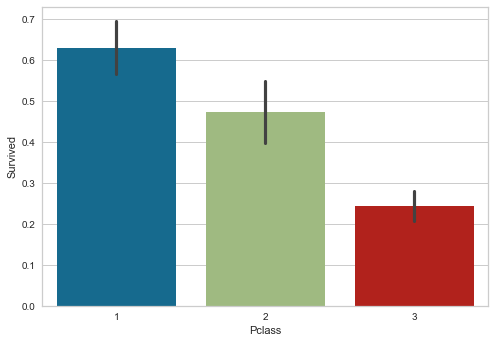

In [562]:
#exploring Pclass
sns.barplot(data=train, x='Pclass', y='Survived')
#observations: very clear pattern here as passengers in higher classes had a higher survival rate than those in lower classes
#Pclass definitely an important feature to include in our model!

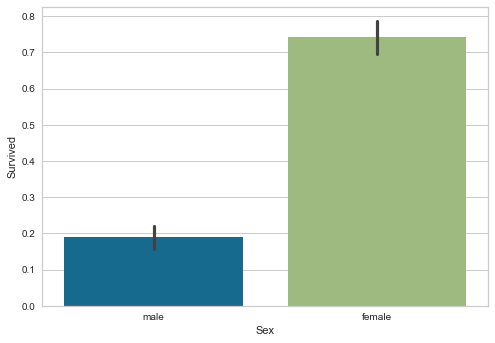

In [563]:
#exploring Sex
sns.barplot(data=train, x='Sex', y='Survived')
#observations: Females were clearly much likelier to survive the males (were evacuated first), sex is another important feature!

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


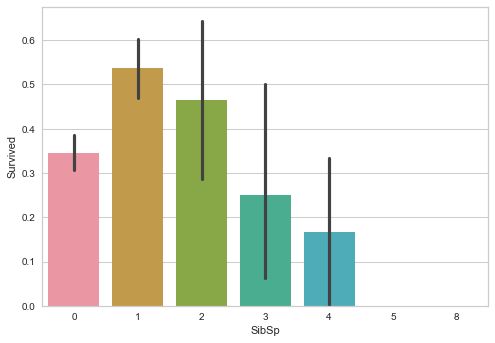

In [564]:
#exploring SibSp
print(train['SibSp'].value_counts())

sns.barplot(data=train, x='SibSp', y='Survived')

#observations: quite a bit of variation here as well...may want to feature engineer something here (i.e., single/pair/group)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


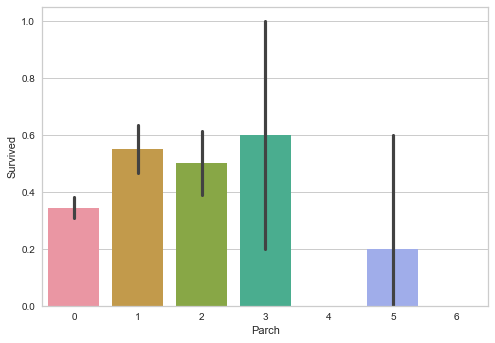

In [565]:
#exploring Parch
print(train['Parch'].value_counts())

sns.barplot(data=train, x='Parch', y='Survived')

#observations: less variability here but still some (may as well include)...also feature engineer (i.e., no family, family)

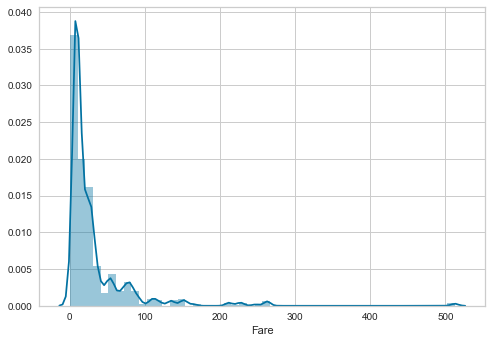

In [566]:
#explore fare
sns.distplot(train['Fare'])
#observations: very much right-skewed (a few extreme prices)...could potentially scale though RF and XGBoost will handle this alright

## Preprocessing

C:\Users\ianno\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ianno\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

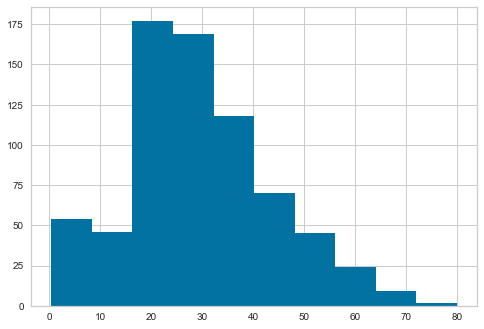

In [567]:
#handling missing values in age
plt.hist(train['Age']) #get an idea of distribution - average age looks to be around 30

train['Age'].describe() #mean is indeed 29.7

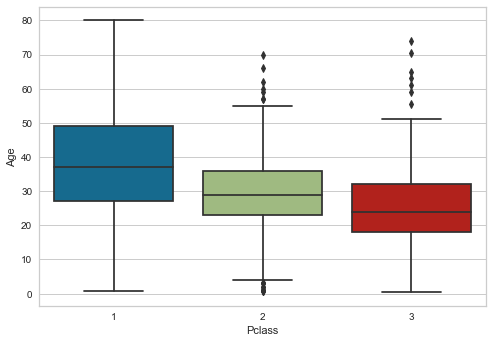

In [568]:
#better yet, let's explore average age by class (Pclass)
sns.boxplot(x='Pclass', y='Age', data=train)
#observations: We clearly see that age tends to decline with class

In [569]:
#let's find what these values are
byClass = train.groupby('Pclass') #grouping df by Pclass
byClass.mean()
#observations: Class 1 = 38, Class 2 = 30, Class 3 = 25

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [570]:
#we'll impute these mean values
# **CODE BELOW IS VERY USEFUL...IMPUTING BY MEAN CONDITIONAL ON ANOTHER VARIABLE**

train['Age'] = train.groupby('Pclass').transform(lambda x: x.fillna(x.mean()))['Age']

In [571]:
train.info()
#observations: we now see that we have no missing values for age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [572]:
#do a check in the actual df (id 5 was NA from Class 3, id 17 was NA from Class 2, and id 31 was NA from Class 1)
train.head(50)
#observe their correctly imputed ages below

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.140620,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [573]:
#now let's investigate the cabin variable...appears to be lots of missing values here!
print(train['Cabin'].nunique())
train['Cabin'].value_counts()
#observations: there are 147 unique values in cabin, all with very few instances each...we can probably drop this column

147


C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
B101           1
A16            1
C106           1
A19            1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [574]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [575]:
#actually...out of curiosity let's explore grabbing the first letter from each cabin (this probably refers to a general area/section of the ship)
train['cabin_section'] = train['Cabin'].astype(str).str[0]
#observations: Note than null values will be classified as a lower case n

In [576]:
train.head() #we see our new feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_section
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


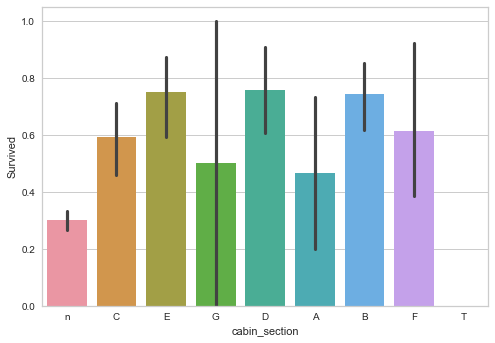

In [577]:
#quick EDA on cabin_section
sns.barplot(data=train, x='cabin_section', y='Survived')
#there does tend to be some variability here - we'll keep this column and drop og Cabin var

In [579]:
train['cabin_section'].value_counts()
#observations: issue here is that we notice some columns have very few records (at risk of not being present in test set)

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_section, dtype: int64

In [580]:
# **ANOTHER VERY USEFUL BIT OF CODE - COMBINING SMALL LEVELS OF A CATEGORICAL INTO AN 'OTHER' BUCKET

series = pd.value_counts(train.cabin_section)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
train['cabin_section'] = np.where(train['cabin_section'].isin(series[mask].index),'Other',train['cabin_section'])

In [582]:
train['cabin_section'].value_counts()

n        687
C         59
B         47
D         33
E         32
A         15
F         13
Other      5
Name: cabin_section, dtype: int64

In [583]:
#lastly let's investigate the embarked variable...2 NA's
train['Embarked'].value_counts()
#observations: the majority of embarked values are S (Southampton)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [584]:
#let's just impute our two NA's with 'S'
train['Embarked'].fillna(value='S', inplace=True)

In [585]:
train['Embarked'].value_counts() #now notice that S instances have increased by 2

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [586]:
train.info() #check: now we have 0 missing values! (remember we are going to drop og Cabin)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
cabin_section    891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [587]:
#drop unnecessary columns (e.g., passengerid, Name, Ticket, Cabin)
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [588]:
train.info() #we look ready to roll

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
cabin_section    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [589]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_section
0,0,3,male,22.0,1,0,7.2500,S,n
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,n
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,n


## Feature Engineering

In [590]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [591]:
#creating a categorical feature from SibSp

# ****CODE BELOW IS VERY USEFUL...engineering new feature based on ifelse commands (essentially equivalent to dplyr's mutate)**

    #define if else function
def f(row):
    if row['SibSp'] == 0:
        val = 'Single'
    elif row['SibSp'] == 1:
        val = 'Pair'
    else:
        val = 'Group'
    return val

#now apply the function to a newly created column in our df
train['group_type'] = train.apply(f, axis=1)

In [592]:
train.head(10) #new feature looks good, makes sense

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_section,group_type
0,0,3,male,22.00000,1,0,7.2500,S,n,Pair
1,1,1,female,38.00000,1,0,71.2833,C,C,Pair
2,1,3,female,26.00000,0,0,7.9250,S,n,Single
3,1,1,female,35.00000,1,0,53.1000,S,C,Pair
4,0,3,male,35.00000,0,0,8.0500,S,n,Single
5,0,3,male,25.14062,0,0,8.4583,Q,n,Single
6,0,1,male,54.00000,0,0,51.8625,S,E,Single
7,0,3,male,2.00000,3,1,21.0750,S,n,Group
8,1,3,female,27.00000,0,2,11.1333,S,n,Single
9,1,2,female,14.00000,1,0,30.0708,C,n,Pair


In [593]:
#creating a categorical feature from Parch (similar idea, though this will be two options)

# ****CODE BELOW IS VERY USEFUL...engineering new feature based on ifelse commands (essentially equivalent to dplyr's mutate)**

    #define if else function
def f2(row):
    if row['Parch'] == 0:
        val = 'No Family'
    else:
        val = 'Family'
    return val

#now apply the function to a newly created column in our df
train['family'] = train.apply(f2, axis=1)

In [594]:
train.head(10) #new feature looks good again

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_section,group_type,family
0,0,3,male,22.00000,1,0,7.2500,S,n,Pair,No Family
1,1,1,female,38.00000,1,0,71.2833,C,C,Pair,No Family
2,1,3,female,26.00000,0,0,7.9250,S,n,Single,No Family
3,1,1,female,35.00000,1,0,53.1000,S,C,Pair,No Family
4,0,3,male,35.00000,0,0,8.0500,S,n,Single,No Family
5,0,3,male,25.14062,0,0,8.4583,Q,n,Single,No Family
6,0,1,male,54.00000,0,0,51.8625,S,E,Single,No Family
7,0,3,male,2.00000,3,1,21.0750,S,n,Group,Family
8,1,3,female,27.00000,0,2,11.1333,S,n,Single,Family
9,1,2,female,14.00000,1,0,30.0708,C,n,Pair,No Family


In [595]:
train.info() #looking good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
cabin_section    891 non-null object
group_type       891 non-null object
family           891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [596]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_section,group_type,family
0,0,3,male,22.0,1,0,7.2500,S,n,Pair,No Family
1,1,1,female,38.0,1,0,71.2833,C,C,Pair,No Family
2,1,3,female,26.0,0,0,7.9250,S,n,Single,No Family
3,1,1,female,35.0,1,0,53.1000,S,C,Pair,No Family
4,0,3,male,35.0,0,0,8.0500,S,n,Single,No Family


In [597]:
#one-hot encoding (if necessary???) (will try without first...)

In [598]:
#first let's do one-hot encoding for Sex categorical var
Sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex')

In [599]:
train = train.join(Sex_dummies) #add our created dummies to the training df

In [600]:
train.drop('Sex', axis=1, inplace=True) #drop the og Sex var from the training df

In [601]:
train.head() #we see our changes have been made successfully

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,cabin_section,group_type,family,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,n,Pair,No Family,0,1
1,1,1,38.0,1,0,71.2833,C,C,Pair,No Family,1,0
2,1,3,26.0,0,0,7.9250,S,n,Single,No Family,1,0
3,1,1,35.0,1,0,53.1000,S,C,Pair,No Family,1,0
4,0,3,35.0,0,0,8.0500,S,n,Single,No Family,0,1


In [602]:
#now we do the same for Embarked
Embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = train.join(Embarked_dummies)
train.drop('Embarked', axis=1, inplace=True)

In [603]:
#now we do the same for cabin_section
cabin_section_dummies = pd.get_dummies(train['cabin_section'], prefix='cabin_section')
train = train.join(cabin_section_dummies)
train.drop('cabin_section', axis=1, inplace=True)

In [604]:
#now we do the same for group_type
group_type_dummies = pd.get_dummies(train['group_type'], prefix='group_type')
train = train.join(group_type_dummies)
train.drop('group_type', axis=1, inplace=True)

In [605]:
#now we do the same for family
family_dummies = pd.get_dummies(train['family'], prefix='family')
train = train.join(family_dummies)
train.drop('family', axis=1, inplace=True)

In [606]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_Other,cabin_section_n,group_type_Group,group_type_Pair,group_type_Single,family_Family,family_No Family
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
#think of other features????

## Splitting the Training Data

In [607]:
#following a standard holdout method
from sklearn.model_selection import train_test_split

In [608]:
#define X (features) and y (target)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [609]:
#split our data into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

In [610]:
#preview the training features
X_train #observe: 712 records in our training set (remainder are in testing set)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_Other,cabin_section_n,group_type_Group,group_type_Pair,group_type_Single,family_Family,family_No Family
217,2,42.00000,1,0,27.0000,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,1
200,3,28.00000,0,0,9.5000,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
686,3,14.00000,4,1,39.6875,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
97,1,23.00000,0,1,63.3583,0,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0
418,2,30.00000,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2,42.00000,0,0,13.0000,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
601,3,25.14062,0,0,7.8958,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
613,3,25.14062,0,0,7.7500,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
492,1,55.00000,0,0,30.5000,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [611]:
#preview our training targets
y_train

217    0
200    0
686    0
97     1
418    0
      ..
865    1
601    0
613    0
492    0
609    1
Name: Survived, Length: 712, dtype: int64

## Model Building - Decision Tree

In [612]:
#sidenote: we'll try DT, NV, RF, XGB, NN? (no SVM as we need all numerics as the most important features in the df are categorical)

In [613]:
#import decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

In [614]:
#define our decision tree model
dtree = DecisionTreeClassifier(criterion="entropy", random_state=1024) #we'll use default hyperparameters (for now)

In [615]:
#fit the decision tree to our training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1024, splitter='best')

In [616]:
#use the decision tree to predict labels for our test set
y_pred_dtree = dtree.predict(X_test)

In [617]:
#check out our predictions
y_pred_dtree

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [618]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree)))

#observations: 81% accuracy and 74% F1-score...not bad but we can do better!!

[[96 16]
 [18 49]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.75      0.73      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

F1 score = 0.74


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


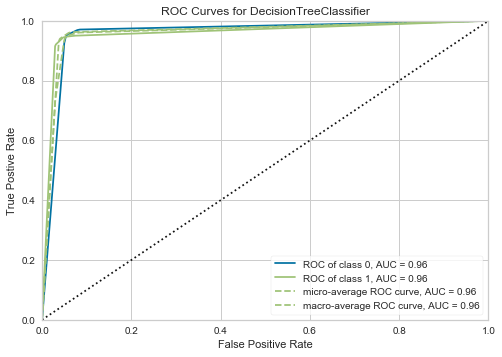

In [619]:
#ROC curve and AUC score
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(dtree)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 96% (we have a good model)

In [ ]:
#SHOULD ADD IN CROSS-VALIDATION HERE (perhaps after holdout for extra validation)

    #see bottom of this workbook for CV code

In [620]:
#hyperparameter tuning using gridsearch
from sklearn.model_selection import GridSearchCV

In [621]:
#specify our parameters grid
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'max_depth': [2,10,50,100,200], 
                 'max_leaf_nodes': [None,5,10,50,100],
                 'min_impurity_decrease': [0,0.1,0.2],
                 'min_samples_leaf': [1,10,50],
                 'min_samples_split': [2,10,50]}

In [622]:
#apply gridsearch to our model
dtree_gs = GridSearchCV(dtree, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)
    #observations: note that we've set scoring to straight up accuracy (for kaggle), in general prefer to use F1-score
    #note that we've also applied 3 repetitions of 5-fold cross-validation

In [623]:
#fit it to our training data
%time dtree_gs.fit(X_train, y_train)

Wall time: 18.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1024,
                                              splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                   

In [624]:
#let's check out the best parameters
dtree_gs.best_params_
#observations: cool

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [625]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_dtree_gs = dtree_gs.predict(X_test)

In [626]:
y_pred_dtree_gs #here the they are

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [627]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_gs))
print(classification_report(y_test, y_pred_dtree_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_gs)))

#observations: 78% accuracy (-1%) and 70% F1-score (-2%)...kind of surprising, but it is a small test set

[[95 17]
 [22 45]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       112
           1       0.73      0.67      0.70        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

F1 score = 0.70


In [283]:
#out of curiosity let's try randomsearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [293]:
#Here we specify what values we want to test for each hyperparameter of interest
parameters_dist = {'criterion': ('gini', 'gini', 'entropy'), #here we are making gini twice as likely to be selected (personal preference)
                 'max_depth': randint(2,200), #will obtain random integer between 2 and 200
                 'max_features': [None, "auto"],
                 'max_leaf_nodes': randint(5,500),
                 'min_impurity_decrease': uniform(0.0, 0.5),
                 'min_samples_leaf': randint(2,50),
                 'min_samples_split': randint(2,50)}

In [303]:
#apply randomsearch to our model
dtree_rs = RandomizedSearchCV(dtree, param_distributions=parameters_dist, scoring="f1", n_jobs=3, cv=5, 
                              return_train_score=True, n_iter=5000)
    #observations: again we use accuracy, 5-fold CV rep 3 times, specify n_iter=5000 (random search will search for 5000 diff combos)

In [304]:
#fit it to our training data
%time dtree_rs.fit(X_train, y_train)

Wall time: 1min 2s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1024,
       

In [305]:
#let's check out the best parameters
dtree_rs.best_params_
#observations: very nice!

{'criterion': 'entropy',
 'max_depth': 131,
 'max_features': None,
 'max_leaf_nodes': 205,
 'min_impurity_decrease': 0.0001425562623948995,
 'min_samples_leaf': 12,
 'min_samples_split': 24}

In [306]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_dtree_rs = dtree_rs.predict(X_test)

In [307]:
y_pred_dtree_rs #here the they are

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [308]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_rs))
print(classification_report(y_test, y_pred_dtree_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_rs)))

#observations: 79% accuracy (-) and 71% F1-score (-1%)...kind of surprising, but it is a small test set

[[97 15]
 [22 45]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.75      0.67      0.71        67

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

F1 score = 0.71


In [ ]:
#FINAL NOTES: Will stick with randomsearch as our best decision tree classifier (dtree_rs)
    #Accuracy = 79%
    #F1-score = 71%

## Model Building - Naive Bayes Classifier

In [628]:
#import naive bayes classifier
from sklearn.naive_bayes import GaussianNB

In [629]:
#define the naive bayes classifier
gnb = GaussianNB()

In [630]:
#fit the naive bayes classifier to our training data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [631]:
#use the naive bayes classifier to predict labels for our test set
y_pred_gnb = gnb.predict(X_test)

In [632]:
#check em out
y_pred_gnb

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [633]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))

#observations: 75% accuracy and 63% F1-score...worse than our decision tree model

[[96 16]
 [29 38]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       112
           1       0.70      0.57      0.63        67

    accuracy                           0.75       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.74      0.75      0.74       179

F1 score = 0.63


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


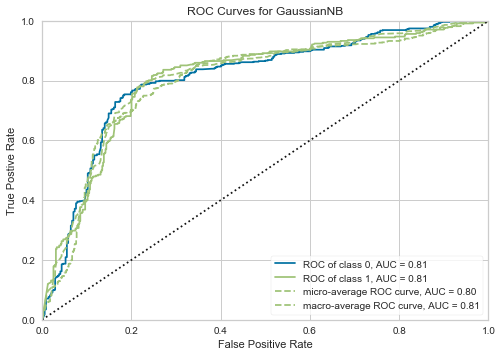

In [634]:
#ROC curve and AUC score
visualizer = ROCAUC(gnb)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 81%...this is solid but not nearly as good as our decision tree classifier

In [ ]:
#can't really tune a naive bayes classifier...

In [ ]:
#FINAL NOTES: Just the one version of the model (gnb)
    #Accuracy = 75%
    #F1-score = 63%

## Model Building - Support Vector Machine

In [635]:
#import SVC (support vector classifier)
from sklearn.svm import SVC

In [636]:
#define the SVC model
svc = SVC() #default hyperparameters

In [637]:
#fit the SVC to our training data
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [638]:
#use the SVC to predict labels for our test set
y_pred_svc = svc.predict(X_test)

In [639]:
#check them out
y_pred_svc

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [640]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_svc)))

#observations: it's shit (note that this was kind of expected given all the categorical variables turned dummies, SVM thrives with true numerics)

[[104   8]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79       112
           1       0.70      0.28      0.40        67

    accuracy                           0.69       179
   macro avg       0.69      0.61      0.60       179
weighted avg       0.69      0.69      0.64       179

F1 score = 0.40


In [641]:
#hyperparameter tuning using gridsearch
#create parameter grid
parameters_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [642]:
#apply gridsearch to our model
svc_gs = GridSearchCV(svc, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [643]:
#fit it to our training data
%time svc_gs.fit(X_train, y_train)

Wall time: 2.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [644]:
#let's see the best parameters
svc_gs.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [645]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_svc_gs = svc_gs.predict(X_test)

In [646]:
#check them out
y_pred_svc_gs

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [647]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_svc_gs))
print(classification_report(y_test, y_pred_svc_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_svc_gs)))

#observations: god damn...it's gotten significantly better through hyperparameter tuning: Accuracy = 79% (+10%) and F1-score = 70% (+30%)
#all of a sudden SVC is not such a bad idea...especially in a potential ensemble

[[99 13]
 [24 43]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.77      0.64      0.70        67

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

F1 score = 0.70


In [333]:
#FINAL NOTES: Most viable SVC is the tuned version through gridsearch (svc_gs)
    #Accuracy = 79%
    #F1-score = 70%
    #current ranking: 1) Decision Tree 2) SVC 3) Naive Bayes

## Model Building - RandomForest

In [648]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [649]:
#define the RF model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
    #observations: note that we are just using some random default hyperparameter values here (will tune later)

In [650]:
#fit the random forest model to our training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [651]:
#use the RF classifier to predict labels for our test set
y_pred_rf = rf.predict(X_test)

In [652]:
#check them out
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [653]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf)))

#observations: Accuracy = 80% and F1-score = 0.73...these are our best results yet...and we've yet to tune the RandomForest

[[97 15]
 [20 47]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.76      0.70      0.73        67

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

F1 score = 0.73


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


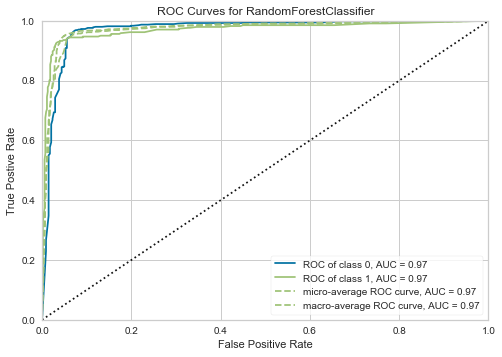

In [654]:
#ROC curve and AUC score
visualizer = ROCAUC(rf)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 97%...best yet (incredibly strong model)

In [359]:
#can investigate feature importance
print(rf.feature_importances_)

X.head()
#observations: we have 24 scores corresponding to our 24 features
#looks as though age (0.22), fare (0.25), and sex (0.12-0.15) were the most noteworthy features

[0.06335703 0.22500172 0.02354832 0.02697168 0.20809924 0.15679349
 0.12222814 0.01480205 0.00854182 0.01996258 0.00290631 0.00710478
 0.00820363 0.00747369 0.00881358 0.00301446 0.00118412 0.0002738
 0.03297086 0.01130798 0.0143882  0.01095163 0.01063261 0.01146825]


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_section_n,group_type_Group,group_type_Pair,group_type_Single,family_Family,family_No Family
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [367]:
#let's try to squeeze a bit more out of it with some hyperparameter tuning
#try gridsearch (took a long time to run)
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'n_estimators': [100, 200, 500],
                 'max_depth': [2,10,50,100], 
                 'max_leaf_nodes': [None,5,10,50],
                 'min_samples_leaf': [1,10,50],
                 'min_samples_split': [2,10,50]}

In [368]:
#apply gridsearch to our model
rf_gs = GridSearchCV(rf, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [369]:
#fit it to our training data
%time rf_gs.fit(X_train, y_train)

Wall time: 7min 37s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [370]:
#let's check the best parameters
rf_gs.best_params_
#note that max_leaf_nodes and min

{'criterion': 'entropy',
 'max_depth': 50,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 100}

In [371]:
#NOW, let's use this tuned randomforest to re-create predictions on our test set
y_pred_rf_gs = rf_gs.predict(X_test)

In [372]:
#check them out
y_pred_rf_gs

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [373]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf_gs))
print(classification_report(y_test, y_pred_rf_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf_gs)))

#observations: Accuracy = 80% (-) and F1-score = 0.72 (-)...no real change in performance here (yet)

[[100  12]
 [ 23  44]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.79      0.66      0.72        67

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

F1 score = 0.72


In [378]:
#let's try using randomsearch
#Here we specify what values we want to test for each hyperparameter of interest
parameters_dist = {'criterion': ('gini', 'gini', 'entropy'), #here we are making gini twice as likely to be selected (personal preference)
                 'n_estimators': randint(100,1000),
                 'max_depth': randint(2,200), #will obtain random integer between 2 and 200
                 'max_features': [None, "auto"],
                 'max_leaf_nodes': randint(5,500), #note the increase in range here based on gridsearch findings
                 'min_impurity_decrease': uniform(0.0, 0.5),
                 'min_samples_leaf': randint(2,50),
                 'min_samples_split': randint(2,200)} #note the increase in range here based on gridsearch findings

In [379]:
#apply randomsearch to our model
rf_rs = RandomizedSearchCV(rf, param_distributions=parameters_dist, scoring="f1", n_jobs=3, cv=5, 
                          return_train_score=True, n_iter=250)
    #observations: 5-fold cross validation, n_iter=250 (decreased from original 5000 due to run time)

In [380]:
#fit it to our training data
%time rf_rs.fit(X_train, y_train)

Wall time: 4min 53s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [381]:
#let's check the best parameters
rf_rs.best_params_
#note that max_leaf_nodes and min_samples_split are about 50 (were maxed out in gridsearch)

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 119,
 'min_impurity_decrease': 0.0035368426655190133,
 'min_samples_leaf': 12,
 'min_samples_split': 74,
 'n_estimators': 545}

In [385]:
#NOW, let's use this tuned RF to re-create predictions on our test set
y_pred_rf_rs = rf_rs.predict(X_test)

In [386]:
#check them out
y_pred_rf_rs

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [387]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf_rs))
print(classification_report(y_test, y_pred_rf_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf_rs)))

#observations: Accuracy = 79% (-1%) and F1-score = 69% (-3%)...surprisingly, a slight decrease here
#may have gotten unlucky / didn't run long enough (increase n_iter)

[[99 13]
 [25 42]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.76      0.63      0.69        67

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.79      0.79      0.78       179

F1 score = 0.69


In [ ]:
#FINAL NOTES: Most viable RandomForest classifier is probably the tuned version through gridsearch (rf_gs)
    #Accuracy = 80%
    #F1-score = 72%
    #current ranking: 1) Random Forest 2) Decision Tree 3) SVC 4) Naive Bayes

## Model Building - Extra Trees

In [878]:
#import extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [879]:
#define the model
et = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=1024)

In [880]:
#fit the extra trees classifier to our training data
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1024, verbose=0,
                     warm_start=False)

In [882]:
#use the extra trees classifier to predict labels for our test set
y_pred_et = et.predict(X_test)

In [883]:
#check them out
y_pred_et

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [884]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_et)))

#observations: Ehhh

[[96 16]
 [21 46]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       112
           1       0.74      0.69      0.71        67

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

F1 score = 0.71


In [885]:
#go through cross-validation as well
et_cv = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=1024)

In [886]:
#perform 10-fold CV
scores = cross_val_score(et_cv, X, y, cv=10, scoring="accuracy")

In [887]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our extra tree's accuracy is 80%...middle of the road

[0.74444444 0.74157303 0.71910112 0.83146067 0.84269663 0.82022472
 0.80898876 0.7752809  0.85393258 0.83146067]
Accuracy: 0.80 (+/- 0.09)


## Model Building - AdaBoost

In [888]:
#import adaboost
from sklearn.ensemble import AdaBoostClassifier

In [889]:
#define the adaboost
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
    n_estimators=100, random_state=1024)

In [890]:
#fit the adaboost model to our training data
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [891]:
#use the extra trees classifier to predict labels for our test set
y_pred_ada = ada.predict(X_test)

In [892]:
#check them out
y_pred_ada

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [893]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_ada)))

#observations: Ehhh...note that we haven't bothered tuning here (placed more focus into XGBoost)

[[93 19]
 [21 46]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       112
           1       0.71      0.69      0.70        67

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

F1 score = 0.70


## Model Building - XGBoost

In [720]:
#import XGBoost classifier
from xgboost import XGBClassifier

In [721]:
#define the model
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
    #observations: note we are just using random hyperparameter values here (will tune afterwards)

In [722]:
#fit the XGBoost classifier to our training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [723]:
#use the XGBoost classifier to predict labels for our test set
y_pred_xgb = xgb.predict(X_test)

In [724]:
#check them out
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [725]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb)))

#observations: Wowzers! Accuracy = 83% and F1-score = 77%...significantly our best result thus far (and without any tuning!)

[[100  12]
 [ 18  49]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.80      0.73      0.77        67

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

F1 score = 0.77


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


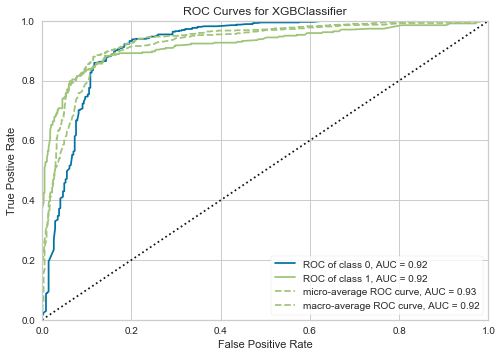

In [726]:
#ROC curve and AUC score
visualizer = ROCAUC(xgb)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

#observations: AUC = 92%...still incredibly strong, although notice that it is lower than RandomForest
#perhaps this means that it's great training results won't translate as well to the test set (slightly overfit?)

In [727]:
#let's try to squeeze a bit more out of it with some hyperparameter tuning
#try gridsearch
parameters_grid = {'min_child_weight': [1,5,10],
                 'gamma': [0.5,1,2,5],
                 'subsample': [0.6,0.8,1.0], 
                 'colsample_bytree': [0.6,0.8,1.0],
                 'max_depth': [3,4,5]}

In [728]:
#apply gridsearch to our model
xgb_gs = GridSearchCV(xgb, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [729]:
#fit it to our training data
%time xgb_gs.fit(X_train, y_train)

Wall time: 49 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=3,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight':

In [730]:
#let's check the best parameters
xgb_gs.best_params_

{'colsample_bytree': 0.6,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [731]:
#NOW, let's use this tuned XGB to re-create predictions on our test set
y_pred_xgb_gs = xgb_gs.predict(X_test)

In [732]:
#check them out
y_pred_xgb_gs

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [733]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb_gs))
print(classification_report(y_test, y_pred_xgb_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_gs)))

#observations: Only a little bit different- Accuracy = 83% (-) and F1-score = 77% (-)

[[96 16]
 [17 50]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       112
           1       0.76      0.75      0.75        67

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

F1 score = 0.75


In [734]:
#let's try using randomsearch
#Here we specify what values we want to test for each hyperparameter of interest
parameters_dist = {'min_child_weight': randint(1, 20),
                 'gamma': [0.5, 1, 2, 5, 10],
                 'subsample': [0.4, 0.6, 0.8, 1.0],
                 'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                 'max_depth': randint(3, 10)}

In [736]:
#apply randomsearch to our model
xgb_rs = RandomizedSearchCV(xgb, param_distributions=parameters_dist, scoring="f1", n_jobs=3, cv=5, 
                           return_train_score=True, n_iter=1000)
    #observations: 5-fold CV, n_iter=1000

In [737]:
#fit it to our training data
%time xgb_rs.fit(X_train, y_train)

Wall time: 1min 7s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                  

In [738]:
#let's check the best parameters
xgb_rs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 3,
 'subsample': 0.6}

In [739]:
#NOW, let's use this tuned XGB to re-create predictions on our test set
y_pred_xgb_rs = xgb_rs.predict(X_test)

In [740]:
#check them out
y_pred_xgb_rs

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [741]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb_rs))
print(classification_report(y_test, y_pred_xgb_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_rs)))

#observations: Got slightly worse in this case - Accuracy = 82% (-1%) and F1-score = 75% (-2%)

[[98 14]
 [20 47]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.77      0.70      0.73        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

F1 score = 0.73


In [ ]:
#FINAL NOTES: Most viable RandomForest classifier is probably the tuned version through gridsearch (xgb_gs)
    #Accuracy = 83%
    #F1-score = 77%
    #current ranking: 1) XGBoost 2) Random Forest 3) Decision Tree 4) SVC 5) Naive Bayes

## Model Ensembling

In [799]:
#Let's try a Voting approach first
#recall our first 3 (non-ensemble) models: Decision Tree (dtree), Naive Bayes Classifier (gnb), Support Vector Classifier (svc_gs)
from sklearn.ensemble import VotingClassifier

In [910]:
#define the classifiers we're going to use in our voting ensemble
clf1 = dtree
clf2 = gnb
clf3 = SVC(probability=True, C=1000, gamma=0.0001, kernel='rbf') #equivalent to svc_gs (which worked rly well)

classifiers = [('DT', clf1), ('GNB', clf2), ('SVM', clf3)]

In [911]:
#apply our voting classifier
clf_vote = VotingClassifier(estimators=classifiers, voting='soft', weights=[2,1,2])
    #observations: we've initially set weights to weigh dtree and SVC predictions higher (due to their better CV results)

In [912]:
#fit all the models on to the training data (refit the individual 3 just in case)
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

clf_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1024,


In [913]:
#NOW, let's use our voting ensemble to predict on our test set
y_pred_clf_vote = clf_vote.predict(X_test)

In [914]:
#check them out
y_pred_clf_vote

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [915]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_clf_vote))
print(classification_report(y_test, y_pred_clf_vote))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_clf_vote)))

#observations: Accuracy = 83% and F1-score = 77%...we've managed to combine 3 mediocre models to get a model that's practically
#performing as well as out top XGBoost

[[99 13]
 [17 50]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.79      0.75      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

F1 score = 0.77


In [867]:
#what if we played around with other combinations - let's do our top 3 performers
clf1 = dtree
clf2 = xgb #swap out nb for xgb
clf3 = SVC(probability=True, C=1000, gamma=0.0001, kernel='rbf') #equivalent to svc_gs (which worked rly well)

classifiers = [('DT', clf1), ('XGB', clf2), ('SVM', clf3)]

In [868]:
#apply our voting classifier
clf_vote = VotingClassifier(estimators=classifiers, voting='soft')

In [869]:
#fit all the models on to the training data (refit the individual 3 just in case)
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

clf_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1024,


In [870]:
#NOW, let's use our voting ensemble to predict on our test set
y_pred_clf_vote = clf_vote.predict(X_test)

In [871]:
#check them out
y_pred_clf_vote

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [872]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_clf_vote))
print(classification_report(y_test, y_pred_clf_vote))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_clf_vote)))

#observations: appears to be even stronger - Accuracy = 84% and F1-score = 78%

[[100  12]
 [ 17  50]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.81      0.75      0.78        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

F1 score = 0.78


In [970]:
#Let's try a Stacking approach first (tends to do the best)
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [971]:
#again, we list out our models that will be part of the ensemble
clf1 = dtree
clf2 = gnb
clf3 = clf3 = SVC(probability=True, C=1000, gamma=0.0001, kernel='rbf')

classifiers = [('DT', clf1), ('GNB', clf2), ('SVM', clf3)]

In [972]:
#apply our stacking classifier
clf_stack = StackingClassifier(classifiers=classifiers, meta_classifier=LogisticRegression(), 
                               use_probas=True, average_probas=False)

In [973]:
#fit all the models on to the training data (refit the individual 3 just in case)
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

clf_stack.fit(X_train, y_train)

#not working...can't seem to troubleshoot

TypeError: Cannot clone object ''DT'' (type <class 'str'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [1009]:
#try another stacking method (via https://github.com/Apress/mastering-ml-w-python-in-six-steps/blob/master/Chapter_4_Code/Code/Stacking.ipynb)

clfs = [dtree, gnb, SVC(probability=True, C=1000, gamma=0.0001, kernel='rbf')]

In [1010]:
#create train and test sets for blending
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

In [1031]:
from sklearn.metrics import accuracy_score

print('5-fold cross validation:\n')
for i, clf in enumerate(clfs):   
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("##### Base Model %0.0f #####" % i)
    print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    clf.fit(X_train, y_train)   
    print("Train Accuracy: %0.2f " % (accuracy_score(clf.predict(X_train), y_train)))
    dataset_blend_train[:,i] = clf.predict_proba(X_train)[:, 1]
    dataset_blend_test[:,i] = clf.predict_proba(X_test)[:, 1]
    print("Test Accuracy: %0.2f " % (accuracy_score(clf.predict(X_test), y_test))) 

5-fold cross validation:

##### Base Model 0 #####
Train CV Accuracy: 0.78 (+/- 0.02)
Train Accuracy: 0.99 
Test Accuracy: 0.81 
##### Base Model 1 #####
Train CV Accuracy: 0.76 (+/- 0.03)
Train Accuracy: 0.76 
Test Accuracy: 0.75 
##### Base Model 2 #####
Train CV Accuracy: 0.81 (+/- 0.02)
Train Accuracy: 0.83 
Test Accuracy: 0.79 


In [1032]:
clf_stack = LogisticRegression()

In [1033]:
scores = cross_val_score(clf_stack, X_train, y_train, cv=10, scoring="accuracy")

C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [1034]:
#fit our stacked ensemble to our training set
clf_stack.fit(X_train, y_train)

C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1035]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81944444 0.875      0.81690141 0.78873239 0.77464789 0.78873239
 0.74647887 0.81690141 0.85915493 0.83098592]
Accuracy: 0.81 (+/- 0.07)


## Building Submission

In [662]:
#import sample submission file
sample_submission = pd.read_csv('gender_submission.csv')

In [663]:
#import official test set
test = pd.read_csv('test.csv')

In [664]:
test.info()
#observations: 418 records...notice our test set has some missing data as well...will have to deal with it in the same fashion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [665]:
#repeat preprocessing and feature engineering

#handling missing values in age
    #let's find what these mean ages are by Pclass
byClass = test.groupby('Pclass') #grouping df by Pclass
byClass.mean()
    #observations: very similar to training set

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


In [666]:
#we'll impute these mean values
# **CODE BELOW IS VERY USEFUL...IMPUTING BY MEAN CONDITIONAL ON ANOTHER VARIABLE**

test['Age'] = test.groupby('Pclass').transform(lambda x: x.fillna(x.mean()))['Age']

In [667]:
test.info() #age is good now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [668]:
#let's check out fare...looks like a single NA - we'll impute this with mean
print(test['Fare'].describe())

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [669]:
test['Fare'].fillna(value=test['Fare'].mean(), inplace=True)

In [670]:
test.info() #fare is good now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [671]:
#now let's check out cabin, only 91 observed records
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [672]:
#actually...out of curiosity let's explore grabbing the first letter from each cabin (this probably refers to a general area/section of the ship)
test['cabin_section'] = test['Cabin'].astype(str).str[0]
#observations: Note than null values will be classified as a lower case n

In [674]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_section
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,n
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,n
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,n
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,n
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,n


In [742]:
test['cabin_section'].value_counts()

KeyError: 'cabin_section'

In [677]:
# **ANOTHER VERY USEFUL BIT OF CODE - COMBINING SMALL LEVELS OF A CATEGORICAL INTO AN 'OTHER' BUCKET

series = pd.value_counts(test.cabin_section)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
test['cabin_section'] = np.where(test['cabin_section'].isin(series[mask].index),'Other',test['cabin_section'])

In [678]:
test['cabin_section'].value_counts()

n        327
C         35
B         18
D         13
E          9
F          8
A          7
Other      1
Name: cabin_section, dtype: int64

In [679]:
#drop unnecessary columns (e.g., passengerid, Name, Ticket, Cabin)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [680]:
test.info() #lookin good after preprocessing --> now into feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass           418 non-null int64
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Embarked         418 non-null object
cabin_section    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [681]:
#creating a categorical feature from SibSp

# ****CODE BELOW IS VERY USEFUL...engineering new feature based on ifelse commands (essentially equivalent to dplyr's mutate)**

    #define if else function
def f(row):
    if row['SibSp'] == 0:
        val = 'Single'
    elif row['SibSp'] == 1:
        val = 'Pair'
    else:
        val = 'Group'
    return val

#now apply the function to a newly created column in our df
test['group_type'] = test.apply(f, axis=1)

In [682]:
#creating a categorical feature from Parch (similar idea, though this will be two options)

# ****CODE BELOW IS VERY USEFUL...engineering new feature based on ifelse commands (essentially equivalent to dplyr's mutate)**

    #define if else function
def f2(row):
    if row['Parch'] == 0:
        val = 'No Family'
    else:
        val = 'Family'
    return val

#now apply the function to a newly created column in our df
test['family'] = test.apply(f2, axis=1)

In [683]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass           418 non-null int64
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Embarked         418 non-null object
cabin_section    418 non-null object
group_type       418 non-null object
family           418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [684]:
##one-hot encoding
#now we do the same for Sex
Sex_dummies = pd.get_dummies(test['Sex'], prefix='Sex')
test = test.join(Sex_dummies)
test.drop('Sex', axis=1, inplace=True)

In [685]:
#now we do the same for Embarked
Embarked_dummies = pd.get_dummies(test['Embarked'], prefix='Embarked')
test = test.join(Embarked_dummies)
test.drop('Embarked', axis=1, inplace=True)

In [686]:
#now we do the same for cabin_section
cabin_section_dummies = pd.get_dummies(test['cabin_section'], prefix='cabin_section')
test = test.join(cabin_section_dummies)
test.drop('cabin_section', axis=1, inplace=True)

In [687]:
#now we do the same for group_type
group_type_dummies = pd.get_dummies(test['group_type'], prefix='group_type')
test = test.join(group_type_dummies)
test.drop('group_type', axis=1, inplace=True)

In [688]:
#now we do the same for family
family_dummies = pd.get_dummies(test['family'], prefix='family')
test = test.join(family_dummies)
test.drop('family', axis=1, inplace=True)

In [690]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_Other,cabin_section_n,group_type_Group,group_type_Pair,group_type_Single,family_Family,family_No Family
0,3,34.5,0,0,7.8292,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,3,47.0,1,0,7.0000,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,3,27.0,0,0,8.6625,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0


In [748]:
#build model (xgb) on full training set now (incorporating our tuned hyperparameters via gridsearch)

xgb_real = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

xgb_real.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1036]:
#make predictions on the true test set
predictions_real = clf_stack.predict(test)

In [1037]:
#check them out
print(predictions_real)
len(predictions_real) #got all of them (418 predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 0 0 0]


418

In [1038]:
#add to the submission file
sample_submission['Survived'] = predictions_real

In [1039]:
#preview our submission file
sample_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1040]:
#export our predictions to csv for submission
sample_submission.to_csv("Stacking Ensemble.csv", index=False)

#observations: results on test set are getting about 77% accuracy...scored 83% on training set...appear to be overfitting

## Model Adjustments - Cross-Validation

In [ ]:
#first use cross-validation instead of holdout
#potentially drop unnecessary features (use RandomForest feature importance as a rough guideline)


In [759]:
#import cross validation and apply it to our models (for improved training ability in case holdout is unlucky)
from sklearn.model_selection import cross_val_score

In [772]:
#let's try it on our decision tree classifier first, again we define our model
dtree_cv = DecisionTreeClassifier(criterion="entropy", random_state=1024)

In [773]:
#perform 10-fold CV (notice that we use the full training set X, y - no holdout train/test split)
scores = cross_val_score(dtree_cv, X, y, cv=10, scoring="accuracy")

In [774]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our decision tree classifier's accuracy is 80%...quite a bit of variance (small df)

[0.72222222 0.82022472 0.71910112 0.80898876 0.84269663 0.80898876
 0.79775281 0.75280899 0.92134831 0.82022472]
Accuracy: 0.80 (+/- 0.11)


In [775]:
#naive bayes classifier
gnb_cv = GaussianNB()

In [776]:
#perform 10-fold CV
scores = cross_val_score(gnb_cv, X, y, cv=10, scoring="accuracy")

In [777]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our decision tree classifier's accuracy is 74%...quite a bit worse than decision tree
#also recall that first time doing holdout we got an accuracy of 78% with NB classifier...can see now that this was fortunate

[0.73333333 0.65168539 0.75280899 0.71910112 0.75280899 0.73033708
 0.75280899 0.71910112 0.76404494 0.80898876]
Accuracy: 0.74 (+/- 0.08)


In [778]:
#SVM
svc_cv = SVC(C=1000, gamma=0.0001, kernel='rbf')

In [779]:
#perform 10-fold CV
scores = cross_val_score(svc_cv, X, y, cv=10, scoring="accuracy")

In [780]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our SVC's accuracy is 82% (with not a crazy amount of variance)...actually seems > decision tree now

[0.82222222 0.82022472 0.7752809  0.86516854 0.79775281 0.79775281
 0.79775281 0.78651685 0.85393258 0.85393258]
Accuracy: 0.82 (+/- 0.06)


In [793]:
#randomforest
rf_cv = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=50, max_leaf_nodes=50, min_samples_leaf=1)

In [794]:
#perform 10-fold CV
scores = cross_val_score(rf_cv, X, y, cv=10, scoring="accuracy")

In [795]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our RF's accuracy is 81%...near the top of our models

[0.78888889 0.80898876 0.76404494 0.82022472 0.85393258 0.79775281
 0.79775281 0.78651685 0.86516854 0.82022472]
Accuracy: 0.81 (+/- 0.06)


In [796]:
#xgboost
xgb_cv = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

In [797]:
#perform 10-fold CV
scores = cross_val_score(xgb_cv, X, y, cv=10, scoring="accuracy")

In [798]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our RF's accuracy is 83%...should be our best model

[0.78888889 0.79775281 0.75280899 0.88764045 0.87640449 0.85393258
 0.83146067 0.79775281 0.85393258 0.85393258]
Accuracy: 0.83 (+/- 0.08)


In [ ]:
#OBSERVATIONS: I think we've chosen the right model (XGBoost), but we've likely overfitted the training set itself (83% training
#performance vs 77% test performance)

## Model Adjustments - Feature Selection

In [791]:
#recall the feature importance info from random forest model
print(rf.feature_importances_)

X.head()

[0.06008981 0.22580304 0.02755211 0.02672556 0.20865856 0.11666107
 0.16377542 0.01509912 0.00764928 0.01469267 0.00269234 0.00846081
 0.00829449 0.00712127 0.00841228 0.00308627 0.00218228 0.03432231
 0.01091078 0.01359725 0.01066964 0.01190682 0.01163684]


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_Other,cabin_section_n,group_type_Group,group_type_Pair,group_type_Single,family_Family,family_No Family
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [1050]:
#let's drop some and rerun a couple of our models (especially ensemble, xgboost)
train.drop(['cabin_section_A', 'cabin_section_B', 'cabin_section_C', 'cabin_section_D', 'cabin_section_E', 
                     'cabin_section_F', 'cabin_section_Other', 'cabin_section_n'], axis=1, inplace=True)

KeyError: "['cabin_section_A' 'cabin_section_B' 'cabin_section_C' 'cabin_section_D'\n 'cabin_section_E' 'cabin_section_F' 'cabin_section_Other'\n 'cabin_section_n'] not found in axis"

In [1051]:
train.drop(['family_Family', 'family_No Family'], axis=1, inplace=True)

In [1054]:
train #now down to 14 columns

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,group_type_Group,group_type_Pair,group_type_Single
0,0,3,22.00000,1,0,7.2500,0,1,0,0,1,0,1,0
1,1,1,38.00000,1,0,71.2833,1,0,1,0,0,0,1,0
2,1,3,26.00000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,1,35.00000,1,0,53.1000,1,0,0,0,1,0,1,0
4,0,3,35.00000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,1,19.00000,0,0,30.0000,1,0,0,0,1,0,0,1
888,0,3,25.14062,1,2,23.4500,1,0,0,0,1,0,1,0
889,1,1,26.00000,0,0,30.0000,0,1,1,0,0,0,0,1


In [1055]:
#redo train/test splits
#define X (features) and y (target)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [1056]:
#split our data into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

In [1057]:
#preview
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,group_type_Group,group_type_Pair,group_type_Single
217,2,42.00000,1,0,27.0000,0,1,0,0,1,0,1,0
200,3,28.00000,0,0,9.5000,0,1,0,0,1,0,0,1
686,3,14.00000,4,1,39.6875,0,1,0,0,1,1,0,0
97,1,23.00000,0,1,63.3583,0,1,1,0,0,0,0,1
418,2,30.00000,0,0,13.0000,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2,42.00000,0,0,13.0000,1,0,0,0,1,0,0,1
601,3,25.14062,0,0,7.8958,0,1,0,0,1,0,0,1
613,3,25.14062,0,0,7.7500,0,1,0,1,0,0,0,1
492,1,55.00000,0,0,30.5000,0,1,0,0,1,0,0,1


In [1059]:
#Decision Tree
dtree = DecisionTreeClassifier(criterion="entropy", random_state=1024)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

In [1061]:
y_pred_dtree

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [1062]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree)))

#observations:

[[93 19]
 [18 49]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       112
           1       0.72      0.73      0.73        67

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

F1 score = 0.73


In [1063]:
#try CV
dtree_cv = DecisionTreeClassifier(criterion="entropy", random_state=1024)
scores = cross_val_score(dtree_cv, X, y, cv=10, scoring="accuracy")

In [1064]:
#view our CV accuracy scores
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average our decision tree classifier's accuracy is 79%...a little worse after removing some of our features

[0.71111111 0.82022472 0.70786517 0.83146067 0.84269663 0.75280899
 0.80898876 0.75280899 0.84269663 0.83146067]
Accuracy: 0.79 (+/- 0.10)


In [1065]:
#RandomForest
#define the RF model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)

In [1066]:
#fit the random forest model to our training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1067]:
#use the RF classifier to predict labels for our test set
y_pred_rf = rf.predict(X_test)

In [1068]:
#check them out
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [1069]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf)))

#observations:

[[97 15]
 [20 47]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.76      0.70      0.73        67

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

F1 score = 0.73


In [1070]:
#XGBoost
#define the model
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

In [1071]:
#fit the XGBoost classifier to our training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1073]:
#use the XGBoost classifier to predict labels for our test set
y_pred_xgb = xgb.predict(X_test)

In [1074]:
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [1075]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb)))

#observations: again...slightly worse...probably better off not cutting out our features

[[98 14]
 [19 48]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.77      0.72      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

F1 score = 0.74
